#### CS 8803 BDS Project
### Author: RAVISH CHAWLA

In [6]:
import keras
from vgg16 import VGG16
from keras.preprocessing import image
import numpy
from imagenet_utils import preprocess_input, decode_predictions

from matplotlib import pyplot
import cv2;

import random;
import os;
import sys;
import time;
%matplotlib inline

import pickle;
from sklearn import svm;
from IPython.display import clear_output

import pandas;


<class 'numpy.ndarray'> (359, 431, 3)
(1, 224, 224, 3)
K.image_dim_ordering: tf
[[('n02124075', 'Egyptian_cat', 0.99584085), ('n02123045', 'tabby', 0.0024856422), ('n02123159', 'tiger_cat', 0.0012679145), ('n02127052', 'lynx', 0.00035750386), ('n02123597', 'Siamese_cat', 8.2065317e-06)]]


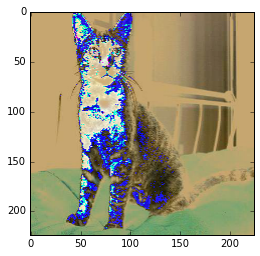

In [2]:
image_addr = "../../machinelearning/datasets/dogs_vs_cats/test/cats/cat.10000.jpg";
img = cv2.imread(image_addr);
print(type(img), img.shape)
img = cv2.resize(img, (224, 224));
img = img.astype(numpy.float32);

img = numpy.expand_dims(img, axis=0);
img = preprocess_input(img);

pyplot.figure();
pyplot.imshow(img[0,:,:,:]);
print(img.shape);

model = VGG16(weights='imagenet');
preds = model.predict(img);

label = decode_predictions(preds);
print(label);

In [3]:
def print_progess(currentProgress, maxProgress, numberDashes):
    progress = numberDashes * (currentProgress / maxProgress) + 1;
    dashes = "=" * int(progress) + "> "
    sys.stdout.write("\r " + dashes + "{0:.2f}".format(int(100 * currentProgress / maxProgress) + 1) + "%");
    sys.stdout.flush();

In [4]:
(random_cat_examples, random_dog_examples) = pickle.load(open('random_examples.dat', 'rb'));

fix_w = 224;
fix_h = 224;
fix_c = 3;

num_train_examples = 10000;

train_dir = "../../machinelearning/datasets/dogs_vs_cats/train/";
cats_dir = "cats/";
dogs_dir = "dogs/";

cats_train_dir = train_dir + cats_dir;
dogs_train_dir = train_dir + dogs_dir;


#random_cat_examples = random.sample(os.listdir(cats_train_dir), num_train_examples);
#random_dog_examples = random.sample(os.listdir(dogs_train_dir), num_train_examples);

#pickle.dump((random_cat_examples, random_dog_examples), open('random_examples.dat', 'wb'));

In [5]:
def get_features(folder, images_addrs):
    sys.stdout.flush();
    images = numpy.zeros([len(images_addrs), fix_h, fix_w, fix_c]);
    for img_ix in range(0, len(images_addrs)):
        img = cv2.imread(folder + images_addrs[img_ix]);
        img = cv2.resize(img, (fix_h, fix_w));
        images[img_ix, :, :, :] = img;
        
        print_progess(img_ix, len(images_addrs), 30);
        
    sys.stdout.write("\n ");
    images = preprocess_input(images);
    
    model = VGG16(weights='imagenet');
    preds = model.predict(images, verbose=1);
    return preds;

In [6]:
#(total_cat_feats, total_dog_feats) = pickle.load(open('cat_dog_buffer_list_10000.dat', 'rb'));
print("DON'T RUN THIS BLOCK FOR NO REASON");
alkdjfasdjfkla;dsjflas;;lsjdkfa;lf#precaution
start = 0*100;
split = 100;
num_chunks = len(random_cat_examples) / split;
total_cat_feats = list();
total_dog_feats = list();
for chunk in range(0, int(num_chunks)):
    clear_output();
    print("completed " + str(len(total_cat_feats)) + " cat sets and " + str(len(total_dog_feats)) + " dog sets");
    
    cat_examples = random_cat_examples[start:start+split];
    cat_feats = get_features(cats_train_dir, cat_examples);
    total_cat_feats.append(cat_feats);
    
    dog_examples = random_dog_examples[start:start+split];
    dog_feats = get_features(dogs_train_dir, dog_examples);
    total_dog_feats.append(dog_feats);
    
    start = start+split;
    
    pickle.dump((total_cat_feats, total_dog_feats), open('cat_dog_buffer_list_10000.dat', 'wb'));

SyntaxError: invalid syntax (<ipython-input-6-7ea16381aadb>, line 3)

In [7]:
(total_cat_feats, total_dog_feats) = pickle.load(open('cat_dog_buffer_list_10000.dat', 'rb'));
#pickle.dump((total_cat_feats, total_dog_feats), open('cat_dog_feats_10000.dat', 'wb'));
numpy.concatenate(total_cat_feats).shape

(10000, 1000)

In [8]:
percent_test = 0.1;

cat_feats = numpy.concatenate(total_cat_feats);
dog_feats = numpy.concatenate(total_dog_feats);

train_test_data = numpy.concatenate([cat_feats, dog_feats]);
train_test_labels = numpy.concatenate([[-1] * len(cat_feats), [1] * len(dog_feats)]);
combined = numpy.column_stack([train_test_data, train_test_labels]);

numpy.random.shuffle(combined);

train_test_data = combined[:, 0:combined.shape[1] - 1]
train_test_labels = combined[:, combined.shape[1] - 1];

accuracies = list();

for i in range(0, 10):
    test_pos_start = i * (percent_test * len(train_test_data));
    test_pos_end = (i+1) * (percent_test * (len(train_test_data)))
    print("training on " + str(test_pos_end - test_pos_start) + " examples");
    
    train_data = numpy.concatenate([train_test_data[0 : test_pos_start], train_test_data[test_pos_end : len(train_test_data)]]);
    train_labels = numpy.concatenate([train_test_labels[0 : test_pos_start], train_test_labels[test_pos_end : len(train_test_labels)]]);
    
    test_data = train_test_data[test_pos_start : test_pos_end];
    test_labels = train_test_labels[test_pos_start : test_pos_end];
    
    clf = svm.SVC(verbose=True);
    svm_model = clf.fit(train_data, train_labels);
    predictions = svm_model.predict(test_data);
    accuracy = len(predictions[predictions == test_labels]) / predictions.shape[0];
    accuracies.append(accuracy);
    print(accuracy);

print("average: ");
print(sum(accuracies) / len(accuracies));

training on 2000.0 examples
[LibSVM]

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:26: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.786
training on 2000.0 examples
[LibSVM]0.7765
training on 2000.0 examples
[LibSVM]0.7875
training on 2000.0 examples
[LibSVM]0.786
training on 2000.0 examples
[LibSVM]0.7835
training on 2000.0 examples
[LibSVM]0.7725
training on 2000.0 examples
[LibSVM]0.7955
training on 2000.0 examples
[LibSVM]0.7815
training on 2000.0 examples
[LibSVM]

KeyboardInterrupt: 

In [30]:
from IPython.display import clear_output
for i in range(0, 100):
    clear_output();
    sys.stdout.write("1\n");
    sys.stdout.write("2\n");
    sys.stdout.write("3\n");
    sys.stdout.write("4\n");

1
2
3
4


In [2]:
(total_cat_feats, total_dog_feats) = pickle.load(open('cat_dog_buffer_list_10000.dat', 'rb'));

In [3]:
cat_feats = numpy.concatenate(total_cat_feats);
dog_feats = numpy.concatenate(total_dog_feats);

In [5]:
def get_string(arr, label):
    stri = numpy.array_str(arr);
    stri = stri.replace("\n", "");
    stri = ','.join(stri.split());
    stri = stri.replace("[,", "");
    stri = stri.replace("]", "");
    stri = stri + "," + label + "\n";
    return stri;


headers = numpy.linspace(0, 1000, 1000, dtype='int32');
headers_stri = get_string(headers, 'label');

cat_feats = cat_feats[0:1000, :];
dog_feats = dog_feats[0:1000, :];

file = open('cat_dog_1000.csv', 'w');
file.write(headers_stri);
for row in cat_feats:
    stri = get_string(row, '-1');
    file.write(stri);
for row in dog_feats:
    stri = get_string(row, '1');
    file.write(stri);
file.close();

In [8]:
pandas.read_csv('cat_dog_10000.csv')

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,1000,label
0,1.529223e-07,3.488649e-07,1.873567e-06,3.734699e-06,3.414121e-06,4.566690e-06,4.017984e-07,1.224164e-07,1.675161e-07,3.609073e-09,...,9.147742e-08,1.791406e-07,8.297848e-07,1.949708e-07,1.260854e-06,5.649838e-08,4.148333e-07,1.963029e-04,0.000078,-1
1,3.909269e-06,1.072841e-04,1.258913e-05,6.299230e-05,1.913716e-05,1.694538e-04,1.825903e-05,2.093279e-04,1.306846e-04,1.092209e-05,...,4.961622e-06,2.046720e-06,5.096849e-06,6.635239e-06,6.257823e-06,2.097168e-06,1.350462e-06,4.791637e-04,0.004311,-1
2,1.022963e-06,4.109367e-05,2.535673e-06,2.212613e-06,4.184752e-06,2.597193e-05,5.703182e-06,2.067691e-05,2.145899e-04,3.012494e-06,...,3.382673e-06,1.928398e-05,1.736742e-06,5.540404e-07,1.753917e-06,1.230044e-05,6.751559e-07,7.869284e-05,0.001547,-1
3,1.488950e-07,2.527576e-06,1.767247e-06,4.471785e-06,4.279124e-07,7.202710e-07,1.127965e-07,3.781792e-07,4.449708e-07,1.014267e-07,...,1.033234e-07,9.689048e-08,6.184684e-08,2.311819e-08,7.232725e-08,4.440310e-07,4.995353e-08,1.175880e-05,0.000387,-1
4,3.368283e-05,3.834372e-05,1.950527e-05,3.080690e-05,6.494759e-05,8.889169e-05,3.620712e-05,6.236899e-06,2.139123e-05,3.188201e-06,...,1.325749e-05,4.963535e-06,7.173449e-07,8.384692e-07,1.386682e-05,2.480713e-06,2.549128e-06,6.925739e-03,0.003385,-1
5,6.331982e-06,1.273941e-05,3.133126e-05,2.261180e-05,1.913981e-05,7.082015e-06,1.345379e-06,3.523135e-05,1.281316e-05,5.246505e-06,...,6.927008e-07,3.318596e-06,1.047571e-06,4.759083e-07,1.947907e-06,2.176416e-06,2.226515e-06,1.052042e-04,0.000418,-1
6,1.341702e-06,4.910199e-06,1.687863e-04,1.178467e-04,1.004256e-03,2.015344e-05,1.210406e-05,8.994720e-05,4.247771e-05,1.182371e-05,...,2.170078e-06,2.614662e-06,1.314040e-07,5.136231e-07,3.861351e-06,7.042767e-07,3.791755e-07,7.592219e-05,0.029657,-1
7,2.338708e-06,1.229778e-05,9.037595e-07,6.370843e-06,1.760849e-05,7.095852e-06,1.489324e-06,3.684333e-05,1.301788e-04,3.399283e-06,...,2.003870e-06,2.507369e-06,6.512951e-07,4.392026e-07,4.219384e-06,9.339657e-06,1.420335e-06,1.232759e-04,0.005500,-1
8,1.700354e-06,2.117769e-05,4.861085e-05,1.802298e-05,1.002010e-05,7.071268e-06,1.834638e-06,1.449091e-05,5.839004e-06,7.827065e-07,...,1.366342e-06,2.569690e-06,4.704108e-07,1.484823e-06,6.269064e-06,1.249047e-06,2.365487e-07,1.003263e-04,0.017718,-1
9,4.630561e-06,3.181354e-06,2.247312e-06,1.341486e-06,2.236837e-06,5.156382e-06,2.940010e-07,5.556705e-06,2.668426e-06,1.038485e-06,...,1.354891e-06,2.062963e-06,1.316887e-07,1.135148e-07,1.323901e-06,9.555785e-07,1.223519e-06,6.875059e-04,0.000183,-1
